### Discussion Related with Outliers and Impact on Machine Learning

#### Which Machine Learning Models are sensitive to outliers?
1. Naive Bayes Classifier --- Not Sensitive 
2. SVM -------- Not Sensitive
3. Linear Regression ---- Sensitive
4. Logistic Regression ---- Sensitive
5. Decision Tree Regressor or Classifier ---- Not Sensitive
6. Ensemble(RF , xgboost, GB) ---- Not Sensitive
7. KNN ---------     Not Sensitive
8. Kmeans -------    Sensitive
9. Hierarichal ----- Sensitive
10. PCA ------------ Sensitive 
11. Neural Networks - Sensitive


In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

In [587]:
data = pd.read_csv("Titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [588]:
data['Age'].isnull().sum()

177

In [589]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

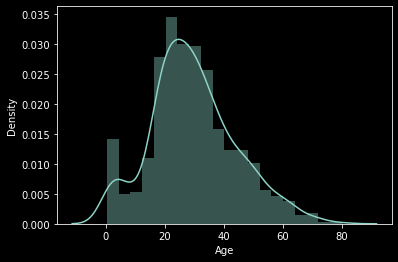

In [590]:
sns.distplot(data['Age'].dropna())

* The graph is Gaussian Distributed

<AxesSubplot:xlabel='Age'>

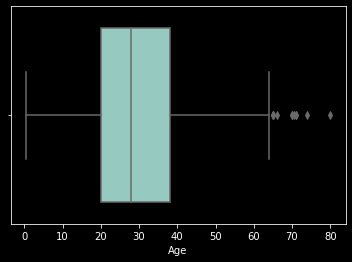

In [591]:
sns.boxplot(data['Age'])

In [592]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming age follows Gaussian Distribution 

* We will be using inter quartile region (iqr)

In [593]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)

In [594]:
iqr = q3 - q1
iqr

17.875

In [595]:
upper_limit = q3 + 1.5 * iqr 
lower_limit = q1 - 1.5 * iqr

upper_limit , lower_limit

(64.8125, -6.6875)

In [596]:
def limit_imputer(value) :
    if value > upper_limit :
        return upper_limit
    if value < lower_limit :
        return 0
    else :
        return value

In [597]:
data['Age'] = data['Age'].apply(limit_imputer)

In [598]:
data['Age'].describe()

count    714.000000
mean      29.622700
std       14.316665
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       64.812500
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

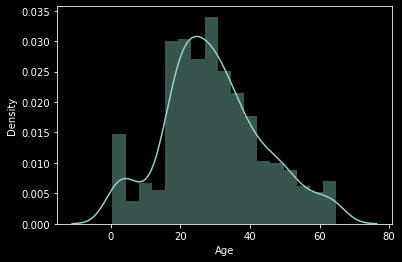

In [599]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

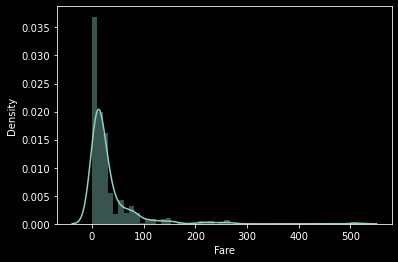

In [600]:
sns.distplot(data['Fare'])

##### Fare seems to be a skewed distribution

In [601]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [602]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)

In [603]:
iqr = q3 - q1
iqr

23.0896

In [604]:
upper_bridge = q3 + 3 * iqr
lower_bridge = q1 - 3 * iqr

upper_bridge , lower_bridge

(100.2688, -61.358399999999996)

In [605]:
def limit_bridge (value) :
    if value > upper_bridge :
        return upper_bridge
    if value < lower_bridge :
        return 0
    else :
        return value

In [606]:
data['Fare'] = data['Fare'].apply(limit_bridge)

<AxesSubplot:xlabel='Fare'>

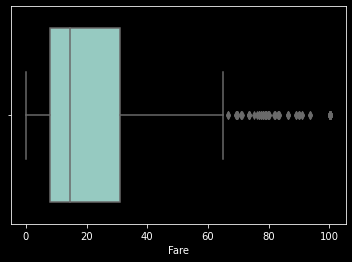

In [607]:
sns.boxplot(data['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

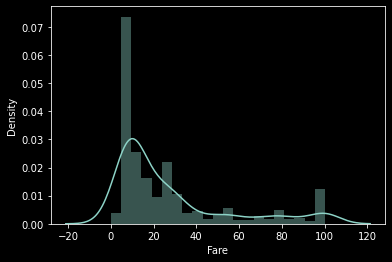

In [608]:
sns.distplot(data['Fare'])

### Dealing with Missing Values

In [609]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [610]:
numerical_columns  = ['Age']
categorical_columns = ['Cabin' , 'Embarked']

In [611]:
from sklearn.impute import SimpleImputer
Num_Imputer = SimpleImputer(missing_values= np.nan , strategy = 'mean')
data[numerical_columns] = Num_Imputer.fit_transform(data[numerical_columns])

In [612]:
Cat_Imputer = SimpleImputer(missing_values= np.nan , strategy = 'most_frequent')
data[categorical_columns] = Cat_Imputer.fit_transform(data[categorical_columns])

In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [614]:
data = data.drop(columns= ['Name', 'Cabin' , 'Ticket'])

In [615]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Mapping Sex and Embarked

In [616]:
# Sex_mapping = {'male' : 1, 'female' : 0}
# data['Sex'] = data['Sex'].map(Sex_mapping)

Embarked_mapping = {'S' : 1, 'C' : 2 , 'Q' : 3}
data['Embarked'] = data['Embarked'].map(Embarked_mapping)

### Creating dummies for Sex and Embarked

In [617]:
sex = pd.get_dummies(data['Sex'] , drop_first= True)
embark = pd.get_dummies(data['Embarked'] , drop_first= True)

In [618]:
data.drop(columns = ['Sex' , 'Embarked'] , axis = 1 , inplace = True)

In [619]:
data = pd.concat([data , sex , embark] , axis = 1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,0
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,0


### Separating the dataset

In [620]:
X = data.drop(columns = ['Survived'])
Y = data['Survived']

In [621]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,2,3
0,1,3,22.0000,1,0,7.2500,1,0,0
1,2,1,38.0000,1,0,71.2833,0,1,0
2,3,3,26.0000,0,0,7.9250,0,0,0
3,4,1,35.0000,1,0,53.1000,0,0,0
4,5,3,35.0000,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0000,0,0,13.0000,1,0,0
887,888,1,19.0000,0,0,30.0000,0,0,0
888,889,3,29.6227,1,2,23.4500,0,0,0
889,890,1,26.0000,0,0,30.0000,1,1,0


### Feature Selection 

In [622]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm

In [623]:
ordered_rank_features = SelectKBest(score_func= chi2 , k = 5)
ordered_features = ordered_rank_features.fit(X , Y)

In [624]:
df_scores = pd.DataFrame(ordered_features.scores_ , columns = ['Score'])
df_columns = pd.DataFrame(X.columns)

In [625]:
features_rank = pd.concat([df_columns , df_scores] , axis= 1)

In [626]:
features_rank.columns = ['Features' , 'Scores']
features_rank.nlargest(n = 10 , columns= ['Scores'])

,Features,Scores
5,Fare,2489.041045
6,male,92.702447
1,Pclass,30.873699
2,Age,23.881141
7,2,20.464401
4,Parch,10.097499
0,PassengerId,3.312934
3,SibSp,2.581865
8,3,0.010847


### Feature Importance

In [627]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X , Y)

ExtraTreesClassifier()

In [628]:
print(model.feature_importances_)

[0.17243317 0.0944113  0.17019926 0.04400399 0.04513506 0.16714747
 0.27409325 0.01974898 0.01282751]


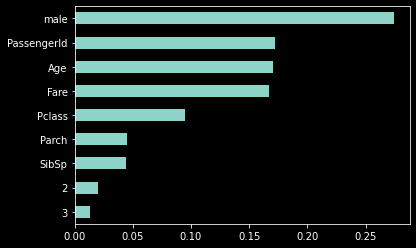

In [629]:
ranked_features = pd.Series(model.feature_importances_  , index = X.columns)
ranked_features.nsmallest(n = 10).plot(kind = 'barh')
plt.show()

### Heatmap

<AxesSubplot:>

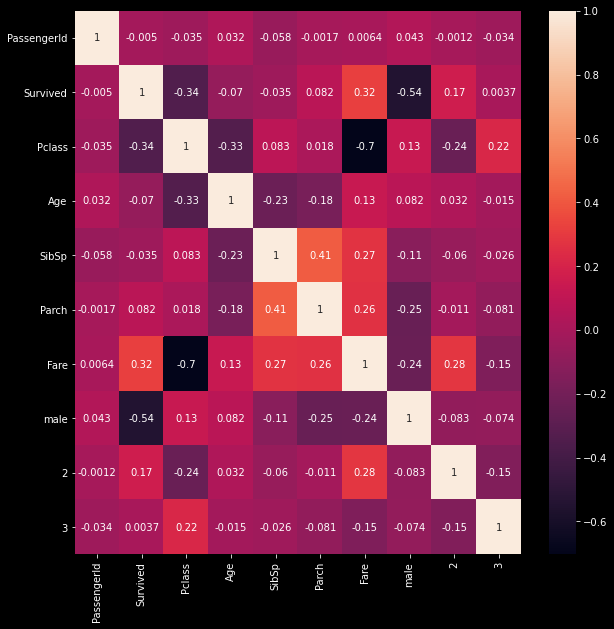

In [630]:
import seaborn as sns
corr = data.corr()
top_features = corr.index
plt.figure(figsize= (10 , 10))
sns.heatmap(data[top_features].corr() , annot = True)

### Information Gain 

In [631]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X , Y)

In [632]:
mutual_data = pd.Series(mutual_info , index = X.columns)
mutual_data.sort_values(ascending= False)

male           0.142377
Fare           0.136485
Pclass         0.039621
3              0.031560
2              0.015228
PassengerId    0.014999
Parch          0.012302
Age            0.011920
SibSp          0.001699
dtype: float64

* 3 seems to be least important feature followed by Age and Parch

In [633]:
Least_Features = ['PassengerId' , 'Parch' , 3 , 2]

X = X.drop(columns= Least_Features)

### Spiliting the data

In [634]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(X , Y , test_size= 0.2 , random_state= 42)

### Applying Random Forest

In [635]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion= 'entropy' , n_estimators= 100 , n_jobs = -1)
classifier.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1)

In [636]:
y_pred = classifier.predict(x_test)

### Confusion Matrix and accuracy score

In [637]:
from sklearn.metrics import confusion_matrix , accuracy_score
C_M = confusion_matrix(y_test , y_pred)
print(C_M)
accuracy_score(y_test , y_pred)

[[91 14]
 [19 55]]


0.8156424581005587